/mnt/OpenFormat/python


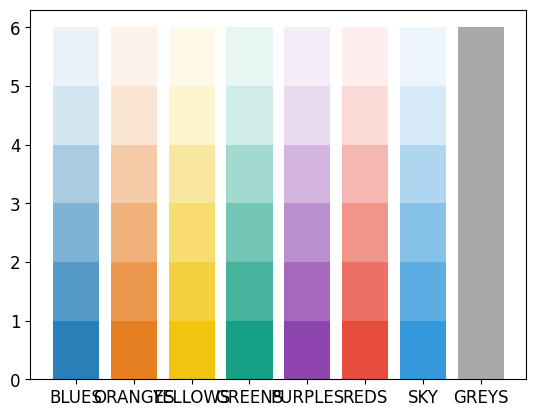

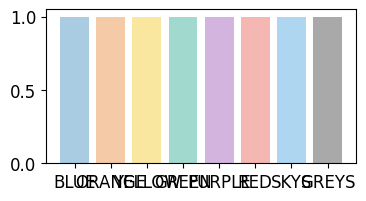

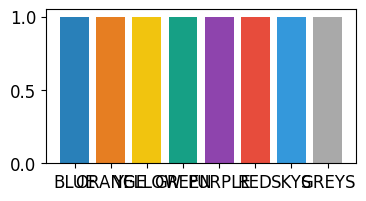

<Figure size 400x200 with 0 Axes>

In [1]:
import json
import os
import sys
import math
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import pathlib
dir_path = pathlib.Path(os.path.abspath('')).parent.resolve()
print(dir_path)
HOME_DIR = str(dir_path).split('/OpenFormat')[0]
PROJ_SRC_DIR = f'{HOME_DIR}/OpenFormat'
sys.path.insert(1, f'{PROJ_SRC_DIR}')
from python.scripts.utils import *
# from user_def_exp import *
matplotlib.rcParams.update({'font.size': 12})
from stylelib import *
from process_helper import *
_, grad_colors = display_colors()
_, bar_colors = select_color_idx(2)
_, line_colors = select_color_idx(5)
colors = [ORANGES[5],GREENS[5],ORANGES[2],GREENS[2]]
# print(line_colors)


# New compression plot with cpu io breakdown

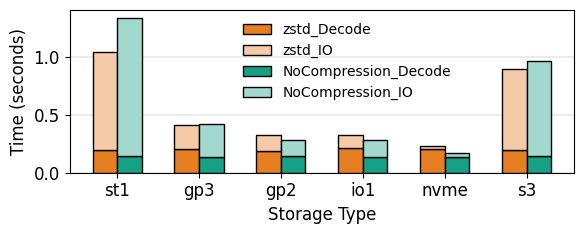

In [3]:
name =  'outputs/compression_exp.csv'
os.chdir(f'{PROJ_SRC_DIR}/python/')
df = pd.read_csv(name)
df_avg = df.groupby(['workload', 'device','compression'], as_index=False).mean().set_index(['workload','device', 'compression'])
d_list = ['st1','th125','gp2', 'io1',  'nvme']
d_list_name = ['st1','gp3','gp2', 'io1',  'nvme']
w_list = sorted(list(set(df['workload'].values)))
w = w_list[0]

time_zstd = []
time_NoCompression = []
preload_time_zstd = []
preload_time_NoCompression = []
# colors = line_colors.values()
for j, t in enumerate(d_list):
    time_zstd.append(df_avg.loc[w, t, 'ZSTD']['time'])
    time_NoCompression.append(df_avg.loc[w, t, 'NONE']['time'])
    preload_time_zstd.append(df_avg.loc[w, t, 'ZSTD']['time_preload'])
    preload_time_NoCompression.append(df_avg.loc[w, t, 'NONE']['time_preload'])
time_zstd.append(0.899004)
time_NoCompression.append(0.967631)
preload_time_zstd.append(preload_time_zstd[0])
preload_time_NoCompression.append(preload_time_NoCompression[0])
d_list_name.append('s3')
fig, ax = plt.subplots(figsize=(6, 2.5))
barWidth = 0.15
br1 = np.arange(0, 0.5*len(time_zstd), 0.5)
br2 = [x + barWidth for x in br1]

# Make the plot
ax.bar(br1, preload_time_zstd, color = colors[0], width = barWidth,
        edgecolor ='black', label ='zstd_Decode')
ax.bar(br1, [b - a for a, b in zip(preload_time_zstd, time_zstd)], color = colors[2], width = barWidth, bottom=preload_time_zstd,
        edgecolor ='black', label ='zstd_IO')
ax.bar(br2, preload_time_NoCompression, color = colors[1], width = barWidth,
        edgecolor ='black', label ='NoCompression_Decode')
ax.bar(br2, [b - a for a, b in zip(preload_time_NoCompression, time_NoCompression)], color = colors[3], width = barWidth, bottom=preload_time_NoCompression,
        edgecolor ='black', label ='NoCompression_IO')
ax.set_xticks([r + 0.5*barWidth for r in br1],
        d_list_name)
ax.set_axisbelow(True)
ax.grid(axis='y', linewidth=0.35)
ax.set_ylabel('Time (seconds)', fontsize=12)
ax.set_xlabel('Storage Type', fontsize=12)
# ax.set_title('Time to Scan 1M Rows 20 Columns on Core Dataset', y=1.08, fontsize=14)
ax.set_ylim(bottom=0)
ax.legend(columnspacing=0.5, ncol=1, frameon=False, fontsize=10, bbox_to_anchor=(0.55, 1), loc='upper center')
plt.tight_layout()
plt.savefig(f'figures/compression.pdf')
plt.show()
